<a href="https://colab.research.google.com/github/rodrigomariamorgao/portfolio_data_science/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="BannerDataScience" width="100%" src="https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/banner.png">

In [116]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# **Detecção de Fraudes em Cartões de Crédito**

Neste projeto iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil cerca de **12,1 milhões de pessoas** já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de **R$ 1,8 bilhão de prejuízo** para os últimos 12 meses.

<p align=center>
<img src="https://www.creditooudebito.com/wp-content/uploads/2019/04/fraude-cartao.jpg" width="60%"></p>

Dentre essas fraudes, as que envolvem cartões de crédito são de grande relevância, uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma **economia de milhões de Reais**. E esse é o desafio: aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## **Importando os Dados**

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam **apenas 0,17% do total**.

Outro detalhe interessante é que as *features* são todas numéricas, pois foram descaracterizadas (por restrições ligadas à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$. 

<p align=center>
<img src="https://image.freepik.com/free-vector/landing-page-concept-credit-card-payment_23-2148303916.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud) também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes resultantes pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [117]:
# importar o pacote pandas
import pandas as pd

# importar o pacote numpy
import numpy as np

# definir que o resultado aleatório sempre seja o mesmo
np.random.seed(123)

# caminho do dataset
file_path = "https://www.dropbox.com/s/hlx9qxh02zn228o/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## **Análise Exploratória**

Vamos analisar as 5 primeiras entradas de nosso *Dataframe*.

In [118]:
# verificar as 5 primeiras entradas do Dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A seguir iremos detalhar o significado das variáveis acima.


### **Dicionário de variáveis**

As variáveis (também podemos chamá-las de colunas ou *features*) serão detalhadas abaixo, para nível de conhecimento de nosso *Dataframe*.

Esta etapa tem por objetivo demostrar a situação inicial dos dados e permitir um entendimento de como os mesmos estão estruturados.
1. `Time` - Número de segundos decorridos entre a transação da linha selecionada e a primeira transação no conjunto de dados.
1. `V1 - V28` -  Resultado da redução de dimensionalidade pela transformação PCA, para proteger dados sensíveis e identidade de usuários.
1. `Amount` - Valor da transação.
1. `Class` - Se a transação for fraudulenta, será sinalizada por 1 (um). Caso contrário, será 0 (zero).



Vamos analisar o total de variáveis e entradas que nosso *Dataframe* possui.

In [119]:
# verificar as variáveis e entradas do Dataframe
print(f"Variáveis:\t {df.shape[1]}")
print(f"Entradas:\t {df.shape[0]}")

Variáveis:	 31
Entradas:	 284807


Veremos a seguir um resumo estatístico do *Dataframe*.

In [120]:
# verificar o resumo do Dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Nessa análise podemos afirmar que o valor médio das transações (coluna *Amount*) foi de **U$$ 88.34**. Sendo assim, podemos verificar que as transações não possuíam valores altos.

Em relação a coluna *Time*, podemos também afirmar que o maior tempo em relação à primeira transação foi de **172.792 segundos (48 horas de transações)**. Isso nos dá uma média de **99 transações por minuto**.

Para criarmos um modelo de Machine Learning, nosso *Dataframe* não deve conter dados nulos. Vamos verificar se existe algum campo nessa condição. 

In [121]:
# verificar quantos dados nulos o Dataframe possui
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como podemos verificar, nossas variáveis não possuem nenhum campo nulo.

Vamos analisar nossa coluna alvo *Class*, onde exibe se a transação foi fraudulenta ou não.

In [122]:
# imprimir a quantidade do tipo de transações no Dataframe
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [123]:
#@markdown A maioria das transações foram lícitas. Observemos a baixa porcentagem de transações fraudulentas, juntamente com um gráfico para melhor comparação visual.
print((df[df.Class == 1].shape[0] / df.shape[0]) * 100)

0.1727485630620034


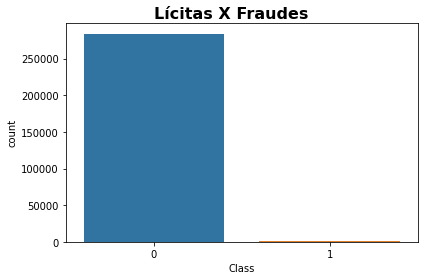

In [124]:
# importar as bibliotecas matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# plotar gráfico de barras para exibir visualmente as classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
plt.text(0, 305000, 'Lícitas X Fraudes',
         fontsize=16, 
         color="#000000",
         weight='bold')
plt.tight_layout()

Vamos analisar graficamente a evolução das transações lícitas e ilícitas, para gerarmos insights em nossa avaliação.

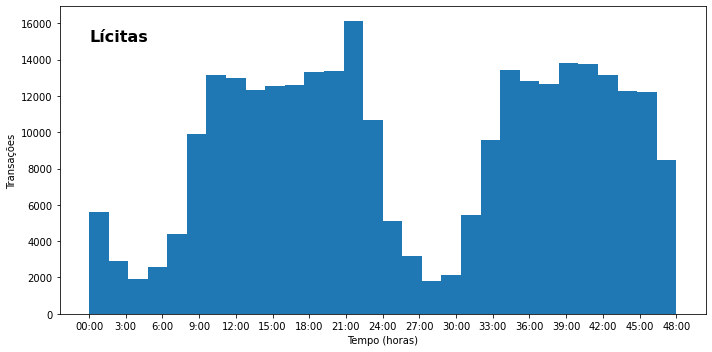

In [172]:
fig, ax = plt.subplots(ncols=1, figsize=(10,5))

x = df.Time[df.Class == 0]

ax.hist(x, bins=30)

hour_starts = []
hour_names = ["00:00"]
hour_increment = 0

for i in range(0, 175000, 10800):
  hour_increment = hour_increment + 3
  hour_starts.append(i)
  hour_names.append(f"{hour_increment}:00")

ax.set_xticks(hour_starts)
ax.set_xticklabels(hour_names)

ax.text(0, 15000, 'Lícitas',
         fontsize=16, 
         color="#000000",
         weight='bold')
plt.xlabel('Tempo (horas)')
plt.ylabel('Transações')
plt.tight_layout()

No gráfico anterior podemos afirmar que, entre as 21 e 24h de coletas de transações em nosso *Dataset*, ocorreram o maior número de transações lícitas simultâneas.

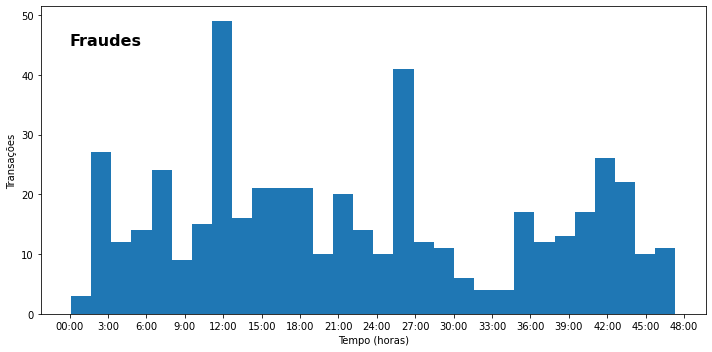

In [173]:
fig, ax = plt.subplots(ncols=1, figsize=(10,5))

x = df.Time[df.Class == 1]

ax.hist(x, bins=30)

hour_starts = []
hour_names = ["00:00"]
hour_increment = 0

for i in range(0, 175000, 10800):
  hour_increment = hour_increment + 3
  hour_starts.append(i)
  hour_names.append(f"{hour_increment}:00")

ax.set_xticks(hour_starts)
ax.set_xticklabels(hour_names)

ax.text(0, 45, 'Fraudes',
         fontsize=16, 
         color="#000000",
         weight='bold')
plt.xlabel('Tempo (horas)')
plt.ylabel('Transações')
plt.tight_layout()

Já no gráfico a respeito das fraudes, podemos afirmar que, em torno das 12h iniciais, ocorreram o maior número de transações fraudulentas simultaneamente. Infelizmente não temos a coluna com o horário real, pois seria interessante para visualizarmos qual horário é o preferido para tentativa de fraudes.

Podemos verificar o relacionamento entre variáveis, utilizando um mapa de calor.

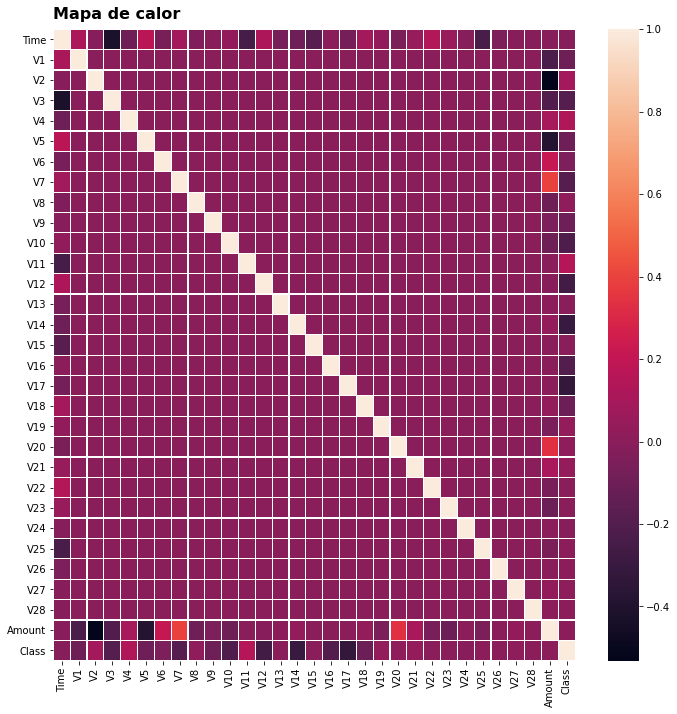

In [127]:
# criar um heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=.2)
ax.text(0, -0.5, 'Mapa de calor',
         fontsize=16, 
         color="#000000",
         weight='bold')
plt.tight_layout()

Com esse mapa de calor podemos verificar quais variáveis possuem total relação (cor mais clara) e nenhuma relação (cor mais escura). Na tabela abaixo podemos verificar as mesmas informações, de outra maneira, quanto mais próximo de 1, melhor a relação entre as variáveis.

In [128]:
df.corr().style.background_gradient(cmap='RdBu_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


Nesse modo, podemos notar que a variável `Class` não possui correlação forte com as variáveis `V6, V7 e V9`, entre outras, com resultado abaixo de 0 (zero).

## **Preparação dos Dados**

Nessa etapa, iremos preparar nossos dados para que possamos construir o modelo de Machine Learning. Iniciaremos normalizando os dados das colunas `Time` e `Amount`.

In [129]:
# importar o pacote StandardScaler
from sklearn.preprocessing import StandardScaler

# criar uma cópia do Dataframe original
df_copy = df.copy()

# instanciar o pacote para normalizar
std_scaler = StandardScaler()

# remover as colunas da cópia do Dataframe, para recriarmos no próximo passo
df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

# recriar as colunas, normalizando as mesmas
df_copy['Time'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df_copy['Amount'] = std_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# ver as primeiras entradas do Dataframe alterado
df_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Nosso próximo passo consiste dividir nossos dados entre treino e teste, para utilizarmos na construção de nosso modelo de classificação.

In [130]:
# importar a função train_test_split
from sklearn.model_selection import train_test_split

# separar variáveis X e y
X = df_copy.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Vamos verificar como ocorreu nossa divisão.

In [131]:
print(f"Nosso Dataset contém {df_copy.shape[1]} variáveis e {df_copy.shape[0]} colunas.")
print(f"Nossos dados de treino são: X = {X_train.shape} e y = {y_train.shape}")
print(f"Nossos dados de teste são: X = {X_test.shape} e y = {y_test.shape}")

Nosso Dataset contém 31 variáveis e 284807 colunas.
Nossos dados de treino são: X = (227845, 30) e y = (227845,)
Nossos dados de teste são: X = (56962, 30) e y = (56962,)


Notamos que nossos dados foram divididos de acordo com nosso parâmetro `test_size`: 80% de dados para treino e 20% de dados para teste.

## **Modelos de Machine Learning - Dados Desbalanceados**

Após a análise de nosso *Dataframe*, iremos construir modelos de classificação para validar qual terá melhor performance em nossa previsão entre transações lícitas ou fraudulentas. Os modelos escolhidos foram **Regressão Logística, Árvore de Decisão e KNN**.

### Regressão Logística

In [132]:
# importar o modelo LogisticRegression
from sklearn.linear_model import LogisticRegression

# instanciar o modelo
model_logistic_regression_unbalanced = LogisticRegression()

# treinamento do modelo
model_logistic_regression_unbalanced.fit(X_train, y_train)

# importar o pacote cross_val_score
from sklearn.model_selection import cross_val_score

# gerar o score de validação do modelo
scores_model_logistic_regression_unbalanced = cross_val_score(model_logistic_regression_unbalanced, X_train, y_train, cv=5)

print(f"Scores: {scores_model_logistic_regression_unbalanced}")
print(f"Acurácia: {(scores_model_logistic_regression_unbalanced.mean()):.6f} (+/- {(scores_model_logistic_regression_unbalanced.std() * 2):.6f})")

Scores: [0.99912221 0.99934166 0.99925388 0.99923193 0.99925388]
Acurácia: 0.999241 (+/- 0.000140)


### Árvore de Decisão

In [133]:
# importar o modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instanciar o modelo e escolher os hyperparameters
model_decision_tree_unbalanced = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# treinamento do modelo
model_decision_tree_unbalanced.fit(X_train, y_train)

# gerar o score de validação do modelo
scores_model_decision_tree_unbalanced = cross_val_score(model_decision_tree_unbalanced, X_train, y_train, cv=5)

print(f"Scores: {scores_model_decision_tree_unbalanced}")
print(f"Acurácia: {(scores_model_decision_tree_unbalanced.mean()):.6f} (+/- {(scores_model_decision_tree_unbalanced.std() * 2):.6f})")

Scores: [0.99931971 0.9993636  0.99958305 0.99929777 0.99945138]
Acurácia: 0.999403 (+/- 0.000208)


### KNN

In [134]:
# importar o pacote neighbors
from sklearn import neighbors

# instanciar o modelo e escolher os hyperparameters
model_knn_unbalanced = neighbors.KNeighborsClassifier(n_neighbors=5)

# treinamento do modelo
model_knn_unbalanced.fit(X_train, y_train)

# gerar o score de validação do modelo
scores_model_knn_unbalanced = cross_val_score(model_knn_unbalanced, X_train, y_train, cv=5)

print(f"Scores: {scores_model_knn_unbalanced}")
print(f"Acurácia: {(scores_model_knn_unbalanced.mean()):.6f} (+/- {(scores_model_knn_unbalanced.std() * 2):.6f})")

Scores: [0.99962694 0.99956111 0.99947333 0.99942944 0.99945138]
Acurácia: 0.999508 (+/- 0.000148)


Vamos avaliar qual dos modelos teve melhor performance, de acordo com as avaliações geradas com a técnica *Cross Validation*.

In [161]:
result_scores = { 
                  "Acurácia Regressão Logística": scores_model_logistic_regression_unbalanced.mean(),
                  "Acurácia Árvore de Decisão": scores_model_decision_tree_unbalanced.mean(),
                  "Acurácia KNN": scores_model_knn_unbalanced.mean()
                }

# pegar o maior resultado da acurácia
max_value = max(result_scores.values())
max_keys = [key for key, value in result_scores.items() if value == max_value]
print(max_value, max_keys)

0.999508437753736 ['Acurácia KNN']


De acordo com a maior acurácia, definimos que o melhor modelo a ser utilizado é o **KNN**.

**Lembrando que os dados utilizados até esse momento estão desbalanceados.**

### **Avaliar o desempenho do modelo KNN - Dados desbalanceados**

Nessa etapa iremos avaliar o desempenho do modelo utilizando os dados desbalanceados.

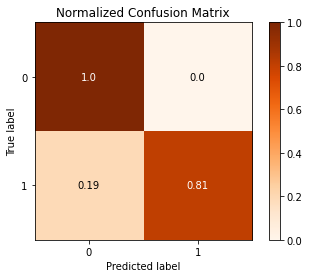

In [163]:
# instalar skplt
!pip install -q scikit-plot

# importar a função skplt
import scikitplot as skplt

# criar uma matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn_unbalanced, normalize=True, cmap='Oranges')
plt.show()

Podemos notar nessa matrix de confusão que a previsão de transações lícitas é de 100%, mas a previsão de transações fraudulentas é de 81%. Isso se deve aos dados estarem desbalanceados. Na próxima etapa iremos balancear os dados.

## **Balanceamento dos Dados**

Lembramos que no início do projeto verificamos a proporção de atividades lícitas e fraudes, onde a mesma é muito desigual. Para  melhor performance de nosso modelo, iremos balancear o conjunto de dados.

1    377
0    377
dtype: int64


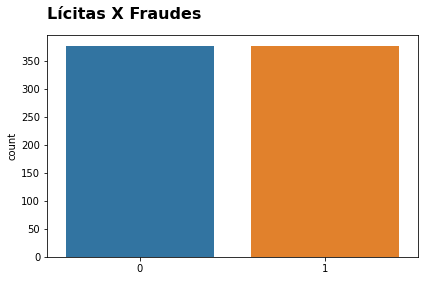

In [136]:
# importar a função RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# técnica de balanceamento Under-sampling
random_under_sampler = RandomUnderSampler()
X_random_under_sampler, y_random_under_sampler = random_under_sampler.fit_sample(X_train, y_train)

# ver como resultou o balanceamento das classes
print(pd.Series(y_random_under_sampler).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_random_under_sampler)
plt.text(-0.5, 425, 'Lícitas X Fraudes',
         fontsize=16, 
         color="#000000",
         weight='bold')
plt.tight_layout()

Agora com os dados balanceados, podemos comparar os mapas de calor pré e pós balanceamento, para verificarmos se houve alguma diferença.

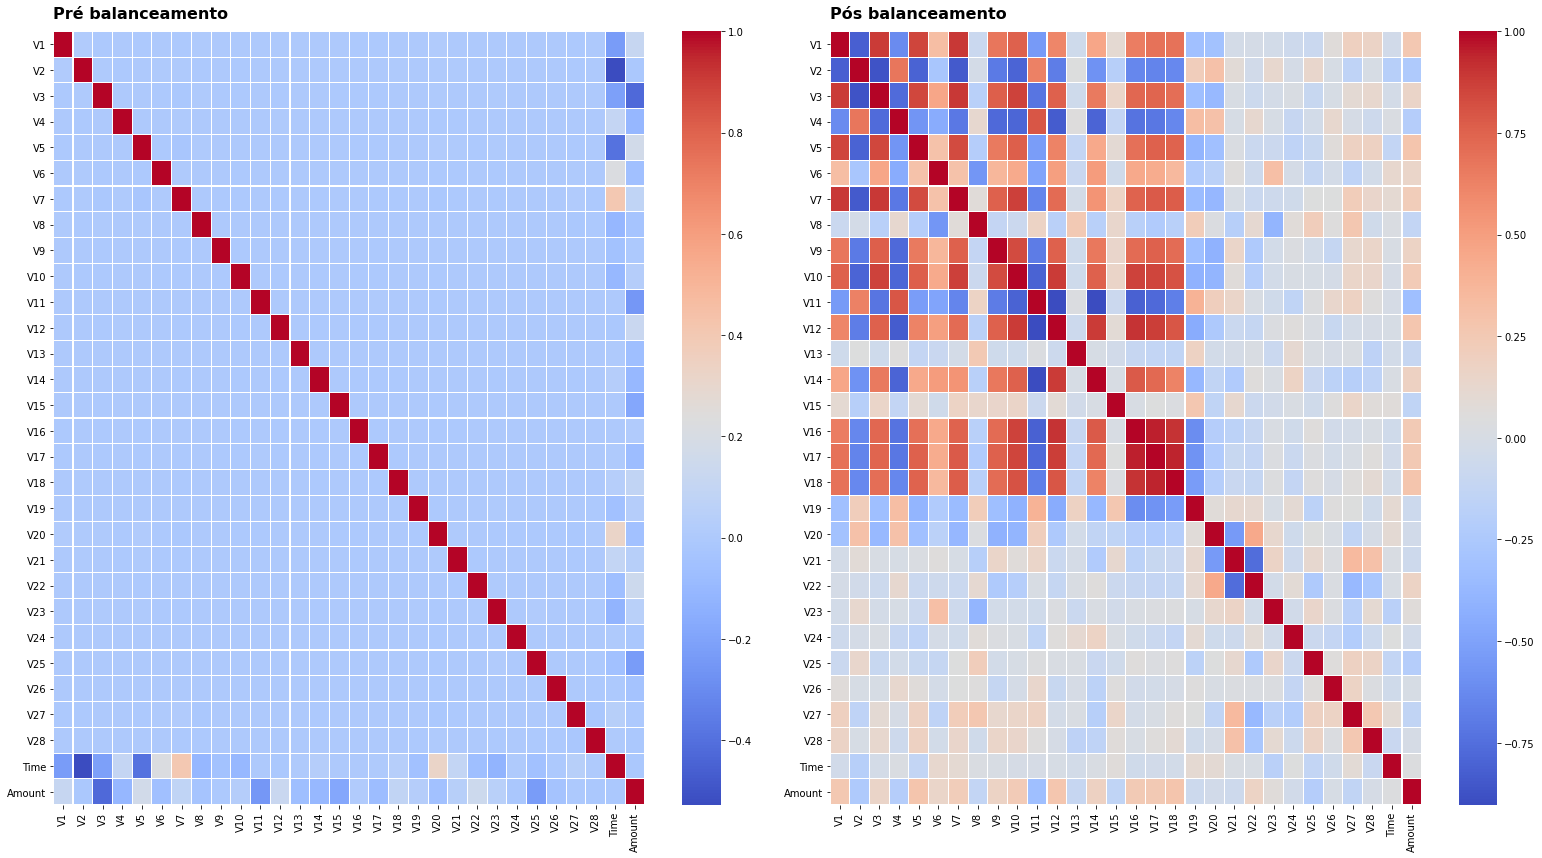

In [137]:
# criar Dataframes pré e pós balanceamento
corr = X_train.corr()
corr_random_under_sampler = pd.DataFrame(X_random_under_sampler).corr()

# criar os mapas de calor contendo os dados de treino pré e pós balanceamento
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (22,12))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="coolwarm", ax=ax[0])
sns.heatmap(corr_random_under_sampler, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="coolwarm", ax=ax[1])

ax[0].text(0, -0.5, 'Pré balanceamento',
         fontsize=16, 
         color="#000000",
         weight='bold')

ax[1].text(0, -0.5, 'Pós balanceamento',
         fontsize=16, 
         color="#000000",
         weight='bold')
plt.tight_layout()

Analisando os mapas de calor acima, notamos que após o balanceamento surgiram variáveis que possuem melhor relação entre elas.

## **Modelo KNN - Dados Balanceados**

Após o balanceamento de nosso *Dataframe*, iremos reconstruir o modelo de classificação utilizando a melhor performance avaliada com a técnica *Cross Validation*.

### KNN

In [138]:
# instanciar o modelo e escolher os hyperparameters
model_knn_balanced = neighbors.KNeighborsClassifier(n_neighbors=5)

# treinamento do modelo
model_knn_balanced.fit(X_random_under_sampler, y_random_under_sampler)

# fazer previsões em cima de novos dados
y_pred_knn_balanced = model_knn_balanced.predict(X_test)

### **Avaliar o desempenho com os dados de teste**

Nessa etapa iremos avaliar o desempenho do modelo utilizando os dados de teste.

In [139]:
# importar a função classification_report
from sklearn.metrics import classification_report

# imprimir relatório de classificação
print(classification_report(y_test, y_pred_knn_balanced))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56847
           1       0.06      0.92      0.12       115

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



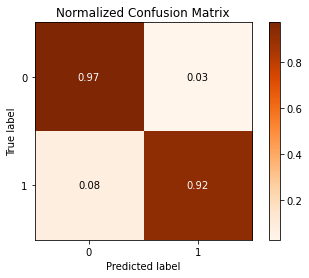

In [170]:
# importar a função skplt
import scikitplot as skplt

# criar uma matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn_balanced, normalize=True, cmap='Oranges')
plt.show()

In [174]:
# importar a função accuracy_score
from sklearn.metrics import accuracy_score

# imprimir a acurácia do modelo
result_accuracy_knn_balanced = accuracy_score(y_test, y_pred_knn_balanced)
print(f"Acurácia: {result_accuracy_knn_balanced:.4f}\n")

Acurácia: 0.9728



In [176]:
# importar a função auc
from sklearn.metrics import roc_auc_score

# imprimir a área sob a curva
result_auc_knn_balanced = roc_auc_score(y_test, y_pred_knn_balanced)
print(f"AUC: {result_auc_knn_balanced:.4f}\n")

AUC: 0.9473



In [143]:
# gerar o score de validação do modelo
scores_model_knn_balanced = cross_val_score(model_knn_balanced, X_test, y_test, cv=5)

print(f"Scores: {scores_model_knn_balanced}")
print(f"Acurácia: {(scores_model_knn_balanced.mean()):.6f} (+/- {(scores_model_knn_balanced.std() * 2):.6f})")

Scores: [0.99894672 0.99929781 0.99912219 0.99964888 0.99912219]
Acurácia: 0.999228 (+/- 0.000476)


## **Conclusão**

Comparando os resultados obtidos com o modelo KNN com os dados desbalanceados e balanceados, podemos chegar no seguinte resultado:

In [144]:
def format_percents(value):
  return f"{value:.6f}"

# criar um dicionário com dados para comparação
results = {'Modelos': ['KNN'],
           'Acurácias desbalanceadas': format_percents(scores_model_knn_unbalanced.mean()),
           'Acurácias balanceadas': format_percents(scores_model_knn_balanced.mean()),
           'AUCs desbalanceadas': format_percents(result_auc_knn_unbalanced),
           'AUCs balanceadas': format_percents(result_auc_knn_balanced)}

# converter em DataFrame
compare = pd.DataFrame(data=results)

# importar a função data_table
from google.colab import data_table

# imprimir a tabela de comparação
data_table.DataTable(compare, include_index=False)

,Modelos,Acurácias desbalanceadas,Acurácias balanceadas,AUCs desbalanceadas,AUCs balanceadas
0,KNN,0.999508,0.999228,0.904242,0.947333


Se comparamos os valores dos modelos desbalanceados e balanceados, podemos notar nos gráficos *Normalized Confusion Matrix* anteriores que, quando utilizado os dados desbalanceados, as métricas para previsão de transações lícitas chegam a quase 100% de desempenho, mas para as transações fraudulentas temos um fraco desempenho. Já com os dados balanceados, temos um desempenho equilibrado entre as transações lícitas como nas fraudulentas. Sendo assim, notamos com essa comparação a suma importância que a etapa de balanceamento de dados tem sobre nossos modelos preditivos.

Podemos comparar também na tabela anterior que, as acurácias desbalanceadas são próximo de 100%, mas que a métrica AUC desbalanceada é inferior a métrica AUC balanceada, confirmando ainda mais nossa afirmação de que o balanceamento de dados é vital para o sucesso de nossos modelos preditivos.

Como citado no início desse projeto, a melhora desse algoritmo já proporciona uma segurança maior durante o uso de cartões de crédito, visto que fica mais preciso a sua eficácia.

Obrigado pela leitura e me acompanhe no [LinkedIn](https://www.linkedin.com/in/rodrigomariamorgao/) e no [Medium](https://medium.com/@rodrigomariamorgao) para outros artigos e análises. Abraço!